In [ ]:
# !wget https://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531812/train_second_section.zip
# !unzip /content/train_second_section.zip
# !cp -rp /content/train_second_section/ '/content/drive/Shared drives/ACloudDrive/tianchi/s2_data/data/'

In [9]:
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import PIL
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools
import seaborn as sns
import shutil
from imageio import imread
import imageio
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import cv2
from skimage.transform import resize
from numpy import save,load
from tqdm import tqdm_notebook, _tqdm_notebook
import gc

PATH            = '/content/drive/Shared drives/ACloudDrive/tianchi/s2_data/data/'
TRAIN_PATH      = '/content/drive/Shared drives/ACloudDrive/tianchi/s2_data/data/train/'
TRAIN_MASK_PATH = '/content/drive/Shared drives/ACloudDrive/tianchi/s2_data/data/train_mask/'

TRAIN_SECOND_PATH      = '/content/drive/Shareddrives/ACloudDrive/tianchi/s2_data/data/train_second_section/train/'
TRAIN_SECOND_MASK_PATH = '/content/drive/Shareddrives/ACloudDrive/tianchi/s2_data/data/train_second_section/train_mask/'

TRAIN_NOISE_PATH       = '/content/drive/Shareddrives/ACloudDrive/tianchi/s2_data/data/train_noise/'
TRAIN_NOISE_MASK_PATH  = '/content/drive/Shareddrives/ACloudDrive/tianchi/s2_data/data/train_noise_mask/'

TRAIN_OK_PATH       = '/content/drive/Shareddrives/ACloudDrive/tianchi/s2_data/data/train_ok/'
TRAIN_OK_MASK_PATH  = '/content/drive/Shareddrives/ACloudDrive/tianchi/s2_data/data/train_ok_mask/'

TEST_PATH       = '/content/drive/Shared drives/ACloudDrive/tianchi/s2_data/data/test/'
CKPT_PATH       = '/content/drive/Shared drives/ACloudDrive/tianchi/s2_data/data/model/'

In [ ]:
!pip freeze > requirements.txt

# Data Explore

In [ ]:
!pip install basic-image-eda


found 1000 images.


  0%|          | 0/1000 [00:00<?, ?it/s]

Using 2 threads. (max:2)



100%|██████████| 1000/1000 [07:09<00:00,  2.33it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  1000

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  513
max height                               |  1536
mean height                              |  1225.605
median height                            |  1250

min width                                |  513
max width                                |  1536
mean width                               |  1215.153
median width                             |  1248

mean height/width ratio                  |  1.0086013859983063
median height/width ratio                |  1.001602564102564
recommended input size(by mean)          |  [1224 1216] (h x w, multiples of 8)
recommended input size(by mean)          |  [1232 1216] (h x w, multiples of 16)
recommended input size(

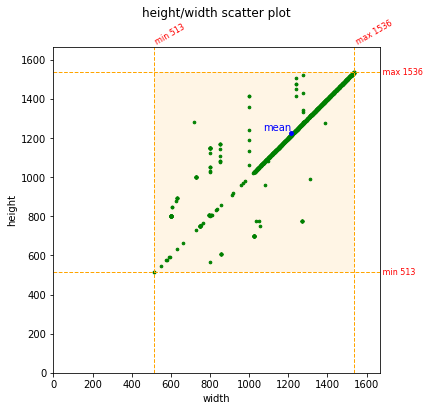

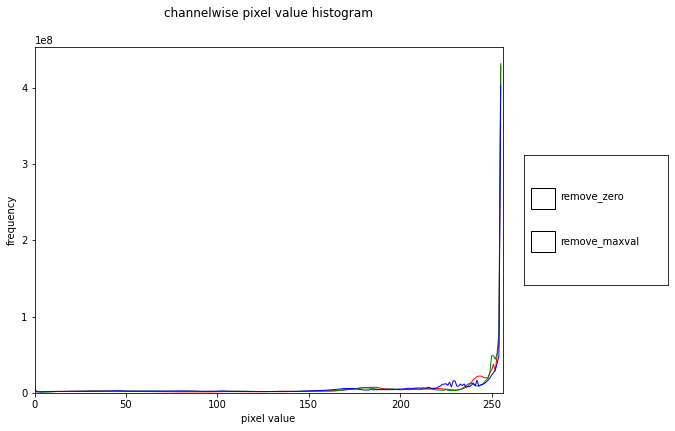

{'channels': [3],
 'dtype': 'uint8',
 'extensions': ['jpg'],
 'max_h': 1536,
 'max_w': 1536,
 'mean': array([0.8175204, 0.8073298, 0.7893748], dtype=float32),
 'mean_h': 1225.605,
 'mean_hw_ratio': 1.0086013859983063,
 'mean_w': 1215.153,
 'median_h': 1250,
 'median_hw_ratio': 1.001602564102564,
 'median_w': 1248,
 'min_h': 513,
 'min_w': 513,
 'rec_hw_size_16': array([1232, 1216]),
 'rec_hw_size_32': array([1216, 1216]),
 'rec_hw_size_8': array([1224, 1216]),
 'std': array([0.26253575, 0.27298078, 0.27370852], dtype=float32)}

In [ ]:
from basic_image_eda import BasicImageEDA
BasicImageEDA.explore(TRAIN_PATH, dimension_plot = True, channel_hist = True)


found 1500 images.


  0%|          | 0/1500 [00:00<?, ?it/s]

Using 2 threads. (max:2)



100%|██████████| 1500/1500 [10:54<00:00,  2.29it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  1500

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  518
max height                               |  1536
mean height                              |  1258.0173333333332
median height                            |  1263

min width                                |  502
max width                                |  1536
mean width                               |  1252.018
median width                             |  1257

mean height/width ratio                  |  1.0047917308963075
median height/width ratio                |  1.0047732696897376
recommended input size(by mean)          |  [1256 1256] (h x w, multiples of 8)
recommended input size(by mean)          |  [1264 1248] (h x w, multiples of 16)
recommended 

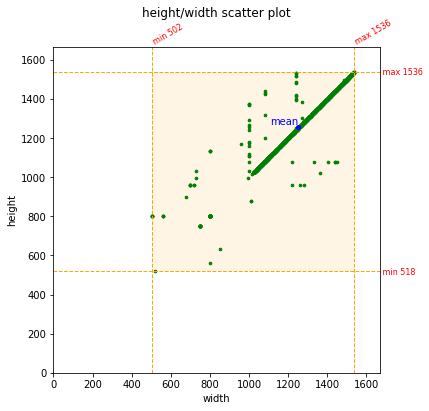

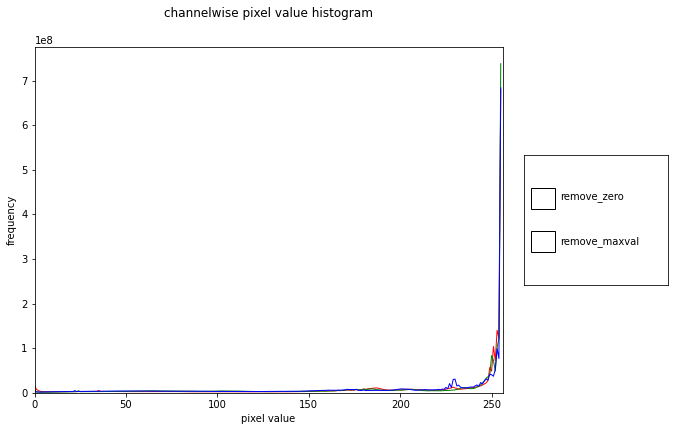

{'channels': [3],
 'dtype': 'uint8',
 'extensions': ['jpg'],
 'max_h': 1536,
 'max_w': 1536,
 'mean': array([0.81688446, 0.81152976, 0.7939248 ], dtype=float32),
 'mean_h': 1258.0173333333332,
 'mean_hw_ratio': 1.0047917308963075,
 'mean_w': 1252.018,
 'median_h': 1263,
 'median_hw_ratio': 1.0047732696897376,
 'median_w': 1257,
 'min_h': 518,
 'min_w': 502,
 'rec_hw_size_16': array([1264, 1248]),
 'rec_hw_size_32': array([1248, 1248]),
 'rec_hw_size_8': array([1256, 1256]),
 'std': array([0.27566925, 0.27331138, 0.28251827], dtype=float32)}

In [ ]:
BasicImageEDA.explore(TEST_PATH, dimension_plot = True, channel_hist = True)


found 1000 images.


  0%|          | 0/1000 [00:00<?, ?it/s]

Using 2 threads. (max:2)



100%|██████████| 1000/1000 [06:10<00:00,  2.70it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  1000

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['png']

min height                               |  513
max height                               |  1536
mean height                              |  1225.605
median height                            |  1250

min width                                |  513
max width                                |  1536
mean width                               |  1215.153
median width                             |  1248

mean height/width ratio                  |  1.0086013859983063
median height/width ratio                |  1.001602564102564
recommended input size(by mean)          |  [1224 1216] (h x w, multiples of 8)
recommended input size(by mean)          |  [1232 1216] (h x w, multiples of 16)
recommended input size(

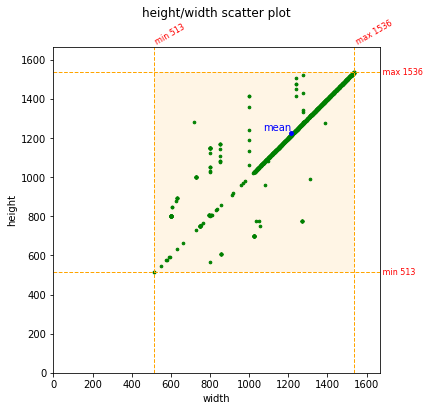

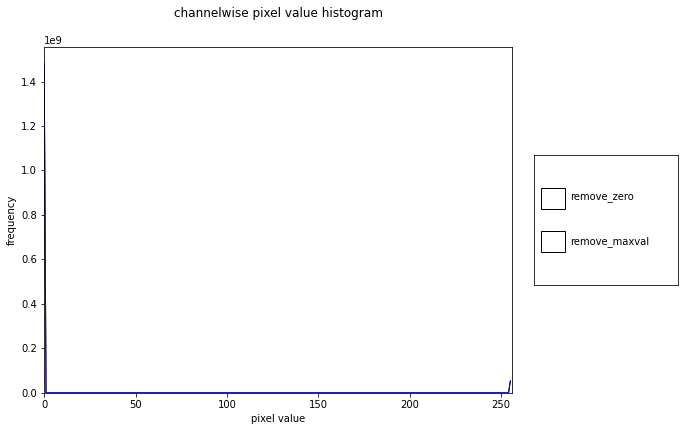

{'channels': [1],
 'dtype': 'uint8',
 'extensions': ['png'],
 'max_h': 1536,
 'max_w': 1536,
 'mean': 0.03677808380126953,
 'mean_h': 1225.605,
 'mean_hw_ratio': 1.0086013859983063,
 'mean_w': 1215.153,
 'median_h': 1250,
 'median_hw_ratio': 1.001602564102564,
 'median_w': 1248,
 'min_h': 513,
 'min_w': 513,
 'rec_hw_size_16': array([1232, 1216]),
 'rec_hw_size_32': array([1216, 1216]),
 'rec_hw_size_8': array([1224, 1216]),
 'std': 0.18821651456016375}

In [ ]:
BasicImageEDA.explore(TRAIN_MASK_PATH, dimension_plot = True, channel_hist = True)

# Convert2ELA

In [ ]:
#method to convert to ela
def ELA(img_path,train_test):
    TEMP = 'ela_' + 'temp.jpg'
    SCALE = 10
    original = Image.open(img_path)
    try:
        original.save(TEMP, quality=90)
        temporary = Image.open(TEMP)
        diff = ImageChops.difference(original, temporary)
        
    except:
        
        original.convert('RGB').save(TEMP, quality=92)
        temporary = Image.open(TEMP)
        diff = ImageChops.difference(original.convert('RGB'), temporary)
        
       
    d = diff.load()
    
    WIDTH, HEIGHT = diff.size
    for x in range(WIDTH):
        for y in range(HEIGHT):
            d[x, y] = tuple(k * SCALE for k in d[x, y])
    return diff

In [ ]:
train_images = []
temp = os.listdir(TRAIN_PATH)
for idx,img in enumerate(temp):
    train_images.append(img)

for img in tqdm.tqdm(train_images, position=0, leave=True):
    ela = ELA(TRAIN_PATH+img)
    ela.save(PATH + 'train_ela/'+img)

100%|██████████| 1000/1000 [23:55<00:00,  1.44s/it]


In [ ]:
test_images = []
temp = os.listdir(TEST_PATH)
for idx,img in enumerate(temp):
    test_images.append(img)

for img in tqdm.tqdm(test_images, position=0, leave=True):
    ela = ELA(TEST_PATH+img)
    ela.save(PATH + 'test_ela/'+img)

100%|██████████| 1500/1500 [44:15<00:00,  1.77s/it]


# Noise mask

In [ ]:

from PIL import Image 
import random
from tqdm import tqdm_notebook, _tqdm_notebook


# Save mask
print('Get noise imgs name and path')
each_noise_name = []
each_noise_path = []

for i in tqdm.notebook.tqdm(list({i.split('.')[0] for i in os.listdir(TRAIN_NOISE_PATH)})):
    i = i.split('.')[0]
    each_noise_path.append(TRAIN_NOISE_PATH + '{}.jpg'.format(i))
    each_noise_name.append(i) 


# Resize mask
print('Get noise img height and width')
h = []
w = []
for filename in tqdm.notebook.tqdm(each_noise_path):
    temp = Image.open(filename)
    h.append(temp.height)
    w.append(temp.width)

print('Resize and save img')
for index in tqdm.notebook.tqdm(range(0,len(os.listdir(TRAIN_NOISE_PATH)))):
    mask = np.zeros((w[index], h[index]),dtype=np.uint8)
    mask = Image.fromarray(mask)
    mask.save(TRAIN_NOISE_MASK_PATH +'{}.png'.format(each_noise_name[index]))
print('DONE! Save NOISE mask img！')

Resize and save img



DONE! Save NOISE mask img！


# Get Training Data and Save


In [10]:
def MakeTrainData():
    df = pd.DataFrame()
    X1 = []
    y = []
    for i in (list({i.split('.')[0] for i in os.listdir(TRAIN_PATH)})):
        i = i.split('.')[0]
        X1.append(TRAIN_PATH + '{}.jpg'.format(i))
        y.append(TRAIN_MASK_PATH + '{}.png'.format(i))
        
    df['X1']  =  X1
    df['y']  =  y 
    return df

def MakeTrainSecData():
    df = pd.DataFrame()
    X1 = []
    y = []
    for i in (list({i.split('.')[0] for i in os.listdir(TRAIN_SECOND_PATH)})):
        i = i.split('.')[0]
        X1.append(TRAIN_SECOND_PATH + '{}.jpg'.format(i))
        y.append(TRAIN_SECOND_MASK_PATH + '{}.png'.format(i))
        
    df['X1']  =  X1
    df['y']  =  y 
    return df

def MakeNoiseSecData():
    df = pd.DataFrame()
    X1 = []
    y = []
    for i in (list({i.split('.')[0] for i in os.listdir(TRAIN_NOISE_PATH)})):
        i = i.split('.')[0]
        X1.append(TRAIN_NOISE_PATH + '{}.jpg'.format(i))
        y.append(TRAIN_NOISE_MASK_PATH + '{}.png'.format(i))
        
    df['X1']  =  X1
    df['y']  =  y 
    return df

def MakeOkSecData():
    df = pd.DataFrame()
    X1 = []
    y = []
    for i in (list({i.split('.')[0] for i in os.listdir(TRAIN_OK_PATH)})):
        i = i.split('.')[0]
        X1.append(TRAIN_OK_PATH + '{}.jpg'.format(i))
        y.append(TRAIN_OK_MASK_PATH + '{}.png'.format(i))
        
    df['X1']  =  X1
    df['y']  =  y 
    return df

## training set 

In [11]:
from tqdm import tqdm_notebook, _tqdm_notebook

train_df = pd.DataFrame()
train_df = MakeTrainData()

train_sec_df = pd.DataFrame()
train_sec_df = MakeTrainSecData()

train_noise_df = pd.DataFrame()
train_noise_df = MakeNoiseSecData()

train_ok_df = pd.DataFrame()
train_ok_df = MakeOkSecData()

X_train = []
for filename in tqdm_notebook(train_df['X1'].values, position=0, leave=True):
    temp = resize(imread(filename),(512,512,3))
    X_train.append(temp)

for filename in tqdm_notebook(train_sec_df['X1'].values, position=0, leave=True):
    temp = resize(imread(filename),(512,512,3))
    X_train.append(temp)
    
for filename in tqdm_notebook(train_noise_df['X1'].values, position=0, leave=True):
    temp = resize(imread(filename),(512,512,3))
    X_train.append(temp)

for filename in tqdm_notebook(train_ok_df['X1'].values, position=0, leave=True):
    temp = resize(imread(filename),(512,512,3))
    X_train.append(temp)
gc.collect()
X_train = np.array(X_train)


Y_train = []
for filename in tqdm_notebook(train_df['y'].values, position=0, leave=True):
    temp = resize(imread(filename),(512,512,1))
    Y_train.append(temp)

for filename in tqdm_notebook(train_sec_df['y'].values, position=0, leave=True):
    temp = resize(imread(filename),(512,512,1))
    Y_train.append(temp)

for filename in tqdm_notebook(train_noise_df['y'].values, position=0, leave=True):
    temp = resize(imread(filename),(512,512,1))
    Y_train.append(temp)   

for filename in tqdm_notebook(train_ok_df['y'].values, position=0, leave=True):
    temp = resize(imread(filename),(512,512,1))
    Y_train.append(temp) 
gc.collect()
Y_train = np.array(Y_train)

save(PATH+'npy/X_train.npy',X_train)
save(PATH+'npy/Y_train.npy',Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [12]:
print(X_train.shape, Y_train.shape)

(2033, 512, 512, 3) (2033, 512, 512, 1)


In [13]:
import random
X_valid = []
Y_valid = []
for i in range(0, 400):
    idx = random.randint(0,1555)
    X_valid.append(X_train[idx])
    Y_valid.append(Y_train[idx])

X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)

save(PATH+'npy/X_valid.npy',X_valid)
save(PATH+'npy/Y_valid.npy',Y_valid)

print(X_valid.shape, Y_valid.shape)

(400, 512, 512, 3) (400, 512, 512, 1)


# Get Test Data and Save
1. Oringinal img
2. ELA img

In [ ]:
from sklearn.utils import shuffle
def MakeTestData():
    df = pd.DataFrame()
    X1 = []
    y = []

    for i in (list({i.split('.')[0] for i in os.listdir(TEST_PATH)})):
        i = i.split('.')[0]
        X1.append(TEST_PATH + '{}.jpg'.format(i)) 
    df['X1']  =  X1
    return df

test_df = pd.DataFrame()
test_df = MakeTestData()
print(test_df.shape)

(1500, 1)


In [ ]:
X_test = []
for filename in tqdm.tqdm(test_df['X1'].values, position=0, leave=True):
    temp = resize(imread(filename),(512,512,3))
    X_test.append(temp)
gc.collect()
X_test = np.array(X_test)

save(PATH+'npy/X_test.npy',X_test)

100%|██████████| 1500/1500 [28:33<00:00,  1.14s/it]


# Augmenting Train Data

In [4]:
!pip install albumentations
import random
import cv2
from matplotlib import pyplot as plt
from albumentations import *

def strong_aug(p=1):
    return Compose([
        RandomRotate90(),
        #Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=.1),
            Blur(blur_limit=3, p=.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomContrast(),
            #RandomBrightness(),
        ], p=0.3),
        #HueSaturationValue(p=0.3),
    ], p=p)

def aug_with_crop(crop_prob = 1):
    return Compose([
       # RandomCrop(p=crop_prob),
        HorizontalFlip(p=0.5),
        VerticalFlip(p=0.5),
        RandomRotate90(p=0.5),
        Transpose(p=0.5),
        ShiftScaleRotate(shift_limit=0.01, scale_limit=0.04, rotate_limit=0, p=0.25),
        RandomBrightnessContrast(p=0.5),
        #RandomGamma(),
        IAAEmboss(p=0.25),
        Blur(p=0.01, blur_limit = 3),
        OneOf([
            ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
            GridDistortion(p=0.5),
            OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)                  
        ], p=0.8)
    ], p = 1)

def augment_flips_color(p=.5):
    return Compose([
        CLAHE(),
        RandomRotate90(),
        Transpose(),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
        Blur(blur_limit=3),
        OpticalDistortion(),
        GridDistortion(),
       # HueSaturationValue()
    ], p=p)

def aug_data_1(p=.5):
    return Compose([
        CLAHE(),
        Transpose(),
        Blur(blur_limit=3),
        OpticalDistortion(),
        ElasticTransform(),
        HueSaturationValue()
    ], p=p)

def aug_data_2(p=.5):
    return Compose([
        CLAHE(),
        Blur(blur_limit=3),
        GridDistortion(),
        ElasticTransform(),
        HueSaturationValue()
    ], p=p)

def horizontalFlip(image,mask):
    aug = HorizontalFlip(p=1)
    augmented = aug(image=image, mask=mask)
    image_hflip = augmented['image']
    mask_hflip = augmented['mask']
    return image_hflip,mask_hflip

def verticalFlip(image,mask):
    aug = VerticalFlip(p=1)
    augmented = aug(image=image, mask=mask)
    image_vflip = augmented['image']
    mask_vflip = augmented['mask']
    return image_vflip,mask_vflip
    
def randomRotate(image,mask):
    aug = RandomRotate90(p=1)
    augmented = aug(image=image, mask=mask)
    image_rot90 = augmented['image']
    mask_rot90 = augmented['mask']
    return image_rot90,mask_rot90
    
def transpose(image,mask):
    aug = Transpose(p=1)
    augmented = aug(image=image, mask=mask)
    image_transpose = augmented['image']
    mask_transpose = augmented['mask']
    return image_transpose,mask_transpose

def elasticDistortion(image,mask):
    aug = ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)
    augmented = aug(image=image, mask=mask)
    image_ed = augmented['image']
    mask_ed = augmented['mask']
    return image_ed,mask_ed

def opticalDistortion(image,mask):
    aug = OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def gridDistortion(image,mask):
    aug = GridDistortion()
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def strong_Aug(image,mask):
    aug = strong_aug(p=1)
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def aug_with_Crop(image,mask):
    aug = aug_with_crop()
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def augment_flips_Color(image,mask):
    aug = augment_flips_color()
    image_od = aug(image=image)['image']
    mask_od = aug(image=mask)['image']
    #augmented = aug(image=image, mask=mask)
    #image_od = augmented['image']
    #mask_od = augmented['mask']
    return image_od,mask_od

def aug_Data_1(image,mask):
    aug = aug_data_1()
    #augmented = aug(image=image, mask=mask)
    image_od = aug(image=image)['image']
    mask_od = aug(image=mask)['image']
    #image_od = augmented['image']
    #mask_od = augmented['mask']
    return image_od,mask_od

def aug_Data_2(image,mask):
    aug = aug_data_2()
    #augmented = aug(image=image, mask=mask)
    image_od = aug(image=image)['image']
    mask_od = aug(image=mask)['image']
    #image_od = augmented['image']
    #mask_od = augmented['mask']
    return image_od,mask_od

def channelShuffle(image,mask):
    aug = ChannelShuffle(p=1)
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def randomBrightness(image,mask):
    #aug = RandomBrightness(limit=1.2, p=0.5)
    aug = RandomBrightness()
    #augmented = aug(image=image, mask=mask)
    image_od = aug(image=image)['image']
    mask_od = aug(image=mask)['image']
    #image_od = augmented['image']
    #mask_od = augmented['mask']
    return image_od,mask_od

def rotate(image,mask):
    #aug = Rotate(limit=286, p=0.5)
    aug = Rotate()
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od
  
def rGBShift(image,mask):
    #aug = RGBShift(r_shift_limit=105, g_shift_limit=45, b_shift_limit=40, p=0.5)
    aug = RGBShift()
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def randomGamma(image,mask):
    #aug = RandomGamma(gamma_limit=12, p=0.5)
    aug = RandomGamma()
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def flip(image,mask):
    aug = Flip()
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def centerCrop(image,mask):
    #aug = CenterCrop(height=288, width=288, p=0.5)
    aug = CenterCrop()
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def hueSaturationValue(image,mask):
   # aug = HueSaturationValue(hue_shift_limit=172, sat_shift_limit=20, val_shift_limit=27, p=0.5)
    aug = HueSaturationValue()
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

     |████████████████████████████████| 634kB 5.4MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654021 sha256=590660ae0ea4479e83106d3922c3c5145d80ff38e9da0eb1c7351cb2882b6d97
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


## Divid train ok data

In [ ]:
from tqdm.notebook import tqdm
train_data = df['X1'].values
mask_data  = df['y'].values
path = PATH

isExists = os.path.exists(path+'train_ok/')
if not isExists:
    os.makedirs(path+'train_ok/') 
isExists = os.path.exists(path+'train_ok_mask/')
if not isExists:
    os.makedirs(path+'train_ok_mask/') 


for i,img in tqdm(zip(list({i.split('.')[0] for i in os.listdir(TRAIN_PATH)}), range(0,1000))):
    image= cv2.imread(train_data[img])
    mask = cv2.imread(mask_data[img],0)

    if cv2.countNonZero(mask) == 0:
        cv2.imwrite(path+'train_ok/{}.jpg'.format(i), image)
        cv2.imwrite(path+'train_ok_mask/{}.png'.format(i), mask)
print(len(path+ 'train_ok/'), len(path+ 'train_ok_mask/'))


71 76


## Get train ok data

In [2]:
TRAIN_OK_PATH = PATH +'train_ok/'
TRAIN_OK_MASK_PATH = PATH +'train_ok_mask/'

def MakeOkData():
    df = pd.DataFrame()
    X = []
    y = []
    for i in (list({i.split('.')[0] for i in os.listdir(TRAIN_OK_PATH)})):
        i = i.split('.')[0]
        X.append(TRAIN_OK_PATH + '{}.jpg'.format(i))
        y.append(TRAIN_OK_MASK_PATH + '{}.png'.format(i))     
    df['X']  =  X
    df['y']  =  y 
    return df

ok_df = pd.DataFrame()
ok_df = MakeOkData()

## Expand train ok

In [5]:
from tqdm.notebook import tqdm
train_data = ok_df['X'].values
mask_data  = ok_df['y'].values
path = PATH + 'train_expand/'

isExists = os.path.exists(path+'images/')
if not isExists:
    os.makedirs(path+'images/') 
isExists = os.path.exists(path+'masks/')
if not isExists:
    os.makedirs(path+'masks/')

w = 1

for img in tqdm(range(len(train_data))):
    image=cv2.imread(train_data[img])
    mask=cv2.imread(mask_data[img])

    img_o=Image.fromarray(image)
    mskh_o=Image.fromarray(mask)
    img_o.save(path+'images/{}_{}.png'.format(img,w))
    mskh_o.save(path+'masks/{}_{}.png'.format(img,w))

    h=horizontalFlip(image,mask)
    imgh=Image.fromarray(h[0])
    mskh=Image.fromarray(h[1])
    imgh.save(path+'images/{}_{}.png'.format(img,w+1))
    mskh.save(path+'masks/{}_{}.png'.format(img,w+1))

    v=verticalFlip(image,mask)
    imgv=Image.fromarray(v[0])
    mskv=Image.fromarray(v[1])
    imgv.save(path+'images/{}_{}.png'.format(img,w+2))
    mskv.save(path+'masks/{}_{}.png'.format(img,w+2))


    f=flip(image,mask)
    imge=Image.fromarray(f[0])
    mske=Image.fromarray(f[1])
    imge.save(path+'images/{}_{}.png'.format(img,w+3))
    mske.save(path+'masks/{}_{}.png'.format(img,w+3))

## Get train data

In [ ]:
TRAIN_PATH = PATH +'train/'
TRAIN_MASK_PATH = PATH +'train_mask/'
from tqdm.notebook import tqdm

def MakeOkData():
    df = pd.DataFrame()
    X = []
    y = []
    for i in (list({i.split('.')[0] for i in os.listdir(TRAIN_PATH)})):
        i = i.split('.')[0]
        X.append(TRAIN_PATH + '{}.jpg'.format(i))
        y.append(TRAIN_MASK_PATH + '{}.png'.format(i))     
    df['X']  =  X
    df['y']  =  y 
    return df

train_df = pd.DataFrame()
train_df = MakeOkData()

## Expand train

In [ ]:
from tqdm.notebook import tqdm
train_data = train_df['X'].values
mask_data  = train_df['y'].values
path = PATH + 'expand/'

isExists = os.path.exists(path+'images/')
if not isExists:
    os.makedirs(path+'images/') 
isExists = os.path.exists(path+'masks/')
if not isExists:
    os.makedirs(path+'masks/')



w = 1

for img in tqdm(range(len(train_data))):
    image=cv2.imread(train_data[img])
    mask=cv2.imread(mask_data[img])

    img_o=Image.fromarray(image)
    mskh_o=Image.fromarray(mask)
    img_o.save(path+'images/{}_{}.png'.format(img,w))
    mskh_o.save(path+'masks/{}_{}.png'.format(img,w))

    h=horizontalFlip(image,mask)
    imgh=Image.fromarray(h[0])
    mskh=Image.fromarray(h[1])
    imgh.save(path+'images/{}_{}.png'.format(img,w+1))
    mskh.save(path+'masks/{}_{}.png'.format(img,w+1))

    v=verticalFlip(image,mask)
    imgv=Image.fromarray(v[0])
    mskv=Image.fromarray(v[1])
    imgv.save(path+'images/{}_{}.png'.format(img,w+2))
    mskv.save(path+'masks/{}_{}.png'.format(img,w+2))

    # t=transpose(image,mask)
    # imgt=Image.fromarray(t[0])
    # mskt=Image.fromarray(t[1])
    # imgt.save(path+'images/{}_{}.png'.format(img,w+3))
    # mskt.save(path+'masks/{}_{}.png'.format(img,w+3))

    r=randomRotate(image,mask)
    imgr=Image.fromarray(r[0])
    mskr=im=Image.fromarray(r[1])
    imgr.save(path+'images/{}_{}.png'.format(img,w+4))
    mskr.save(path+'masks/{}_{}.png'.format(img,w+4))

    # o=opticalDistortion(image,mask)
    # imgo=Image.fromarray(o[0])
    # msko=Image.fromarray(o[1])
    # imgo.save(path+'images/image{}_{}.png'.format(img,w+5))
    # msko.save(path+'masks/mask{}_{}.png'.format(img,w+5))

    # e=elasticDistortion(image,mask)
    # imge=Image.fromarray(e[0])
    # mske=Image.fromarray(e[1])
    # imge.save(path+'images/{}_{}.png'.format(img,w+6))
    # mske.save(path+'masks/{}_{}.png'.format(img,w+6))

    # s=strong_Aug(image,mask)
    # imge=Image.fromarray(s[0])
    # mske=Image.fromarray(s[1])
    # imge.save(path+'images/{}_{}.png'.format(img,w+7))
    # mske.save(path+'masks/{}_{}.png'.format(img,w+7))

    ch=channelShuffle(image,mask)
    imge=Image.fromarray(ch[0])
    mske=Image.fromarray(ch[1])
    imge.save(path+'images/{}_{}.png'.format(img,w+8))
    mske.save(path+'masks/{}_{}.png'.format(img,w+8))

    # ac=aug_with_Crop(image,mask)
    # imge=Image.fromarray(ac[0])
    # mske=Image.fromarray(ac[1])
    # imge.save(path+'images/{}_{}.png'.format(img,w+9))
    # mske.save(path+'masks/{}_{}.png'.format(img,w+9))

    # af=augment_flips_Color(image,mask)
    # imge=Image.fromarray(af[0])
    # mske=Image.fromarray(af[1])
    # imge.save(path+'images/{}_{}.png'.format(img,w+10))
    # mske.save(path+'masks/{}_{}.png'.format(img,w+10))

    # g=gridDistortion(image,mask)
    # imge=Image.fromarray(g[0])
    # mske=Image.fromarray(g[1])
    # imge.save(path+'images/{}_{}.png'.format(img,w+11))
    # mske.save(path+'masks/{}_{}.png'.format(img,w+11))

    # ad=aug_Data_1(image,mask)
    # imge=Image.fromarray(ad[0])
    # mske=Image.fromarray(ad[1])
    # imge.save(path+'images/{}_{}.png'.format(img,w+12))
    # mske.save(path+'masks/{}_{}.png'.format(img,w+12))

    # ad2=aug_Data_2(image,mask)
    # imge=Image.fromarray(ad2[0])
    # mske=Image.fromarray(ad2[1])
    # imge.save(path+'images/{}.png'.format(img,w+13))
    # mske.save(path+'masks/{}.png'.format(img,w+13))

    # hs=hueSaturationValue(image,mask)
    # imge=Image.fromarray(hs[0])
    # mske=Image.fromarray(hs[1])
    # imge.save(path+'images/image{}.png'.format(img,w+14))
    # mske.save(path+'masks/mask{}.png'.format(img,w+14))

    rb=randomBrightness(image,mask)
    imge=Image.fromarray(rb[0])
    mske=Image.fromarray(rb[1])
    imge.save(path+'images/{}.png'.format(img,w+15))
    mske.save(path+'masks/{}.png'.format(img,w+15))

    r=rotate(image,mask)
    imge=Image.fromarray(r[0])
    mske=Image.fromarray(r[1])
    imge.save(path+'images/{}_{}.png'.format(img,w+16))
    mske.save(path+'masks/{}_{}.png'.format(img,w+16))

    # rgb=rGBShift(image,mask)
    # imge=Image.fromarray(rgb[0])
    # mske=Image.fromarray(rgb[1])
    # imge.save(path+'images/{}.png'.format(img,w+17))
    # mske.save(path+'masks/{}.png'.format(img,w+17))

    # rg=randomGamma(image,mask)
    # imge=Image.fromarray(rg[0])
    # mske=Image.fromarray(rg[1])
    # imge.save(path+'images/{}.png'.format(img,w+18))
    # mske.save(path+'masks/{}.png'.format(img,w+18))

    f=flip(image,mask)
    imge=Image.fromarray(f[0])
    mske=Image.fromarray(f[1])
    imge.save(path+'images/{}_{}.png'.format(img,w+19))
    mske.save(path+'masks/{}_{}.png'.format(img,w+19))

In [ ]:
len(os.listdir(path+'images/'))

8000

In [ ]:
len(os.listdir(path+'masks/'))

8000

## Save train augmentation data

In [6]:
from tqdm.notebook import tqdm
EXPAND_TRAIN_PATH = '/content/drive/Shareddrives/ACloudDrive/tianchi/s2_data/data/train_expand/images/'
EXPAND_TRAIN_MASK_PATH = '/content/drive/Shareddrives/ACloudDrive/tianchi/s2_data/data/train_expand/masks/'

def MakeData():
    df = pd.DataFrame()
    X1 = []
    y = []
    for i in (list({i.split('.')[0] for i in os.listdir(EXPAND_TRAIN_PATH)})):
        i = i.split('.')[0]
        X1.append(EXPAND_TRAIN_PATH + '{}.png'.format(i))
        y.append(EXPAND_TRAIN_MASK_PATH + '{}.png'.format(i))
        
    df['X1']  =  X1
    df['y']  =  y 
    return df

In [7]:
df = pd.DataFrame()
df = MakeData()

In [8]:
df.shape

(852, 2)

In [9]:
X_train_aug = []
for filename in tqdm_notebook(df['X1'].values, position=0, leave=True):
    temp = resize(imread(filename),(512,512,3))
    X_train_aug.append(temp)
gc.collect()
X_train_aug = np.array(X_train_aug)


from numpy import save,load
save(PATH+'npy/X_train_aug.npy',X_train_aug)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [10]:
from numpy import save,load
Y_train_aug = []
for filename in tqdm(df['y'].values, position=0, leave=True):
    temp = resize(imread(filename),(512,512,1))
    Y_train_aug.append(temp)
gc.collect()
Y_train_aug = np.array(Y_train_aug)
save(PATH+'npy/Y_train_aug.npy',Y_train_aug)